<a href="https://colab.research.google.com/github/MahyarFardin/Neural-Networks/blob/neural-network/CNN/Malaria_detection/Bad_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.pn

# Organizing directories

In [4]:
train="/content/cell_images/train"
test="/content/cell_images/test"

# Getting more information about data

In [5]:
from matplotlib.image import imread

In [6]:
import os

In [8]:
# os.listdir("/content/cell_images/train/parasitized")

**Infected cell**

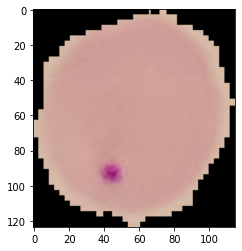

In [10]:
plt.imshow(imread('/content/cell_images/train/parasitized/C109P70ThinF_IMG_20150930_103811_cell_158.png'))

**Healthy cell**

In [12]:
# os.listdir("/content/cell_images/train/uninfected")

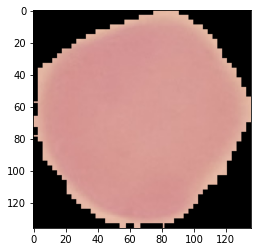

In [13]:
plt.imshow(imread('/content/cell_images/train/uninfected/C201ThinF_IMG_20150930_143544_cell_69.png'))

In [21]:
print("Size of input")
print(len(os.listdir(train+"/uninfected")))
print(len(os.listdir(train+"/parasitized")))
print(len(os.listdir(test+"/uninfected")))
print(len(os.listdir(test+"/parasitized")))

Size of input
12480
12480
1300
1300


**Data set is scaled**

**Shapes of images**

In [26]:
# train uninfected data shape extraction
x=[]
y=[]

for image in os.listdir(train+"/uninfected"):
  # thete was thumb.db file interrupting so I added this condition
  if image[-2:] != "db":
    img=imread(train+"/uninfected/"+image)
    tempx,tempy,channel=img.shape
    x.append(tempx)
    y.append(tempy)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


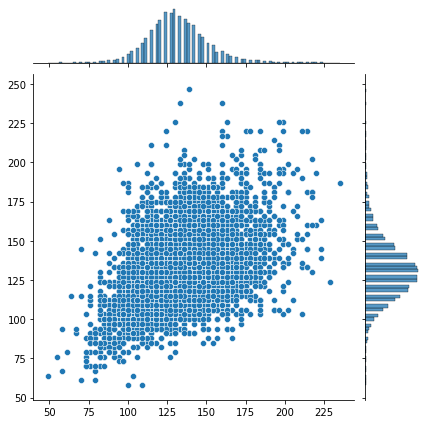

In [27]:
sns.jointplot(x,y)

In [30]:
np.mean(x)

131.64820899110507

In [31]:
np.mean(y)

131.4041990544114

In [32]:
image_shape=(131,131,3)

**I would like to normalize my data shape in this way**

**I already have enough data but I can easily double it and it will be useful so why not**

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
image_generator= ImageDataGenerator(rotation_range=180,
                                    height_shift_range=.1,
                                    width_shift_range=.1,
                                    shear_range=.1,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

# Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
es=EarlyStopping(patience=2)

In [48]:
from tensorflow.python.keras import callbacks
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
# Convolutional layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Dense layers
model.add(Dense(128,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(1,activation="sigmoid"))



# Compile
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

# Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 129, 129, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)     

In [53]:
train_img_gen= image_generator.flow_from_directory(train,
                                                      target_size=image_shape[:2],
                                                      color_mode="rgb",
                                                      batch_size=16,
                                                      class_mode="binary")

test_img_gen= image_generator.flow_from_directory(directory=test,
                                                      target_size=image_shape[:2],
                                                      color_mode="rgb",
                                                      batch_size=16,
                                                      class_mode="binary",
                                                      shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [54]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [60]:
model.fit(train_img_gen,validation_data=test_img_gen,callbacks=[es],epochs=16)

Epoch 1/16
1560/1560 [==============================] - 166s 107ms/step - loss: 0.6910 - accuracy: 0.5528 - val_loss: 0.6806 - val_accuracy: 0.5673
Epoch 2/16
1560/1560 [==============================] - 161s 103ms/step - loss: 0.3705 - accuracy: 0.8393 - val_loss: 0.2443 - val_accuracy: 0.9135
Epoch 3/16
1560/1560 [==============================] - 160s 103ms/step - loss: 0.2399 - accuracy: 0.9206 - val_loss: 0.2580 - val_accuracy: 0.9112
Epoch 4/16
1560/1560 [==============================] - 160s 102ms/step - loss: 0.2069 - accuracy: 0.9369 - val_loss: 0.1994 - val_accuracy: 0.9362
Epoch 5/16
1560/1560 [==============================] - 160s 102ms/step - loss: 0.1894 - accuracy: 0.9419 - val_loss: 0.1954 - val_accuracy: 0.9396
Epoch 6/16
1560/1560 [==============================] - 160s 102ms/step - loss: 0.1855 - accuracy: 0.9422 - val_loss: 0.1903 - val_accuracy: 0.9419
Epoch 7/16
1560/1560 [==============================] - 159s 102ms/step - loss: 0.1784 - accuracy: 0.9450 - val_

In [70]:
prediction = model.predict_generator(test_img_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [72]:
prediction= prediction>.5

In [73]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

# Evaluation

In [61]:
result=pd.DataFrame(model.history.history)

In [62]:
result

,loss,accuracy,val_loss,val_accuracy
0,0.691026,0.552809,0.680593,0.567308
1,0.370502,0.839330,0.244328,0.913462
2,0.239859,0.920627,0.258018,0.911154
3,0.206859,0.936854,0.199374,0.936154
4,0.189441,0.941902,0.195382,0.939615
5,0.185514,0.942183,0.190270,0.941923
6,0.178386,0.945028,0.180178,0.944615
7,0.179920,0.944907,0.209722,0.936538
8,0.178039,0.944747,0.181308,0.943462


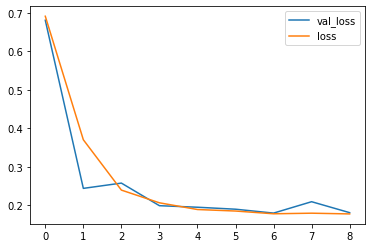

In [63]:
result[["val_loss","loss"]].plot()

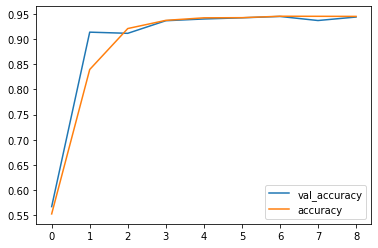

In [64]:
result[["val_accuracy","accuracy"]].plot()

In [69]:
from sklearn import metrics

In [75]:
print(metrics.classification_report(prediction,test_img_gen.classes))

              precision    recall  f1-score   support

       False       0.93      0.96      0.95      1264
        True       0.96      0.93      0.95      1336

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600

